In [84]:
%matplotlib inline
import pandas as pd
import requests
import matplotlib.pyplot as plt
from forex_python.converter import CurrencyRates
from yahoo_scraping import YahooFinanceHistory
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
c = CurrencyRates()
c.get_rate('USD', 'EUR')
budget = 410

---
## Portfolio

In [86]:
def to_eur(x):
    if x['currency'] is not 'EUR':
        x['total_cost_eur'] = x['number_of_stocks'] * x['cost_per_stock_eur']
    else: 
        x['total_cost_eur'] = x['number_of_stocks'] * x['cost_per_stock_eur']
    return x

In [107]:
portfolio = pd.read_excel('investing_source.xlsx', sheet_name='Stocks')

In [108]:
budget = pd.read_excel('investing_source.xlsx', sheet_name='Budget')

In [109]:
portfolio = portfolio.apply(to_eur, axis=1)
portfolio

,date,company,ticker,number_of_stocks,cost_per_stock,cost_per_stock_eur,currency,transaction_costs,color,ETF,Sector,total_cost_eur
0,2020-07-06,NVIDIA,NVDA,2,391,343.32,USD,0.5,#03883B,False,Tech,686.64
1,2020-08-19,Apple,AAPL,1,440,372.52,USD,0.5,#C0C0C0,False,Tech,372.52
2,2020-07-14,Basic Fit,BFIT,1,26,26.00,EUR,0.3,#ff9900,False,NaN,26.00
3,2020-11-08,NVIDIA,NVDA,1,440,400.00,USD,0.5,#03883B,False,Tech,400.00
4,2020-11-09,NVIDIA,NVDA,1,440,400.00,USD,0.5,#03883B,False,Tech,400.00


0     True
1     True
2     True
3    False
Name: ticker, dtype: bool

In [123]:
):
        print(row['ticker'])

True

In [140]:
originals

,date,company,ticker,number_of_stocks,cost_per_stock,cost_per_stock_eur,currency,transaction_costs,color,ETF,Sector,total_cost_eur
0,2020-07-06,NVIDIA,NVDA,2,391,343.32,USD,0.5,#03883B,False,Tech,686.64
1,2020-08-19,Apple,AAPL,1,440,372.52,USD,0.5,#C0C0C0,False,Tech,372.52
2,2020-07-14,Basic Fit,BFIT,1,26,26.00,EUR,0.3,#ff9900,False,NaN,26.00


In [142]:
originals.iloc[0][['number_of_stocks', 'total_cost_eur', 'transaction_costs']] + duplicates.iloc[0][['number_of_stocks', 'total_cost_eur', 'transaction_costs']]

number_of_stocks           3
total_cost_eur       1086.64
transaction_costs          1
dtype: object

In [164]:
originals

,date,company,number_of_stocks,cost_per_stock,cost_per_stock_eur,currency,transaction_costs,color,ETF,Sector,total_cost_eur
ticker,,,,,,,,,,,
NVDA,2020-07-06,NVIDIA,2,391,343.32,USD,0.5,#03883B,False,Tech,686.64
BFIT,2020-07-14,Basic Fit,1,26,26.00,EUR,0.3,#ff9900,False,NaN,26.00
AAPL,2020-08-19,Apple,1,440,372.52,USD,0.5,#C0C0C0,False,Tech,372.52


In [250]:
originals['transaction_costs']

ticker
NVDA    0.5
BFIT    0.3
AAPL    0.5
Name: transaction_costs, dtype: float64

In [258]:
originals

,date,company,number_of_stocks,cost_per_stock,cost_per_stock_eur,currency,transaction_costs,color,ETF,Sector,total_cost_eur
ticker,,,,,,,,,,,
NVDA,2020-07-06,NVIDIA,2,391,343.32,USD,0.5,#03883B,False,Tech,686.64
BFIT,2020-07-14,Basic Fit,1,26,26.00,EUR,0.3,#ff9900,False,NaN,26.00
AAPL,2020-08-19,Apple,1,440,372.52,USD,0.5,#C0C0C0,False,Tech,372.52


In [268]:
portfolio = portfolio.sort_values('date')
originals = portfolio[~portfolio.ticker.duplicated()].set_index('ticker')
cols_to_add = ['number_of_stocks', 'total_cost_eur', 'transaction_costs']

for i, row in portfolio[portfolio.ticker.duplicated()].iterrows():
    tick = row['ticker']
    originals.loc[tick, cols_to_add] = originals.loc[tick, cols_to_add] + row[cols_to_add]

In [269]:
originals

,date,company,number_of_stocks,cost_per_stock,cost_per_stock_eur,currency,transaction_costs,color,ETF,Sector,total_cost_eur
ticker,,,,,,,,,,,
NVDA,2020-07-06,NVIDIA,4,391,343.32,USD,1.5,#03883B,False,Tech,1486.64
BFIT,2020-07-14,Basic Fit,1,26,26.00,EUR,0.3,#ff9900,False,NaN,26.00
AAPL,2020-08-19,Apple,1,440,372.52,USD,0.5,#C0C0C0,False,Tech,372.52


In [8]:
apple = YahooFinanceHistory('AAPL', days_back=30).get_quote()[['Date', 'Close']].set_index('Date')
nvda = YahooFinanceHistory('NVDA', days_back=30).get_quote()[['Date', 'Close']].set_index('Date')

In [41]:
all_prices = pd.DataFrame()
for tick in ['AAPL', 'NVDA']:
    prices = YahooFinanceHistory(tick, days_back=30).get_quote().set_index('Date')['Close'].to_frame().rename({'Close':tick}, axis=1)
    all_prices = prices.join(all_prices)

In [46]:
all_prices

,NVDA,AAPL
Date,,
2020-07-21,413.140015,388.000000
2020-07-22,417.549988,389.089996
2020-07-23,405.190002,371.380005
2020-07-24,407.779999,370.459991
2020-07-27,416.859985,379.239990
2020-07-28,408.619995,373.010010
2020-07-29,418.619995,380.160004
2020-07-30,424.559998,384.760010
2020-07-31,424.589996,425.040009


In [83]:
portfolio.append({'color':'white', 'ticker':'Transaction', 'total_cost_eur':0.5}, ignore_index=True)

,date,company,ticker,number_of_stocks,cost_per_stock,cost_per_stock_eur,currency,transaction_costs,color,ETF,Sector,total_cost_eur
0,2020-11-08 00:00:00,NVIDIA,NVDA,1.0,391.0,343.32,USD,0.5,#03883B,0.0,Tech,343.32
1,2020-08-19 00:00:00,Apple,AAPL,1.0,440.0,372.52,USD,0.5,#C0C0C0,0.0,Tech,372.52
2,NaN,NaN,Transaction,NaN,NaN,NaN,NaN,NaN,white,NaN,NaN,0.50


In [49]:
all_prices.sum(axis=1)

Date
2020-07-21    801.140015
2020-07-22    806.639984
2020-07-23    776.570007
2020-07-24    778.239990
2020-07-27    796.099975
2020-07-28    781.630005
2020-07-29    798.779999
2020-07-30    809.320008
2020-07-31    849.630005
2020-08-03    876.160004
2020-08-04    887.769989
2020-08-05    891.720001
2020-08-06    909.029998
2020-08-07    892.430023
2020-08-10    897.510010
2020-08-11    871.500000
2020-08-12    909.649994
2020-08-13    917.760010
2020-08-14    922.190003
2020-08-17    951.910004
2020-08-18    952.679993
2020-08-19    948.369996
dtype: float64

In [9]:
apple.join(nvda, lsuffix='AAPL', rsuffix='NVDA', sort=True)

,CloseAAPL,CloseNVDA
Date,,
2020-07-21,388.000000,413.140015
2020-07-22,389.089996,417.549988
2020-07-23,371.380005,405.190002
2020-07-24,370.459991,407.779999
2020-07-27,379.239990,416.859985
2020-07-28,373.010010,408.619995
2020-07-29,380.160004,418.619995
2020-07-30,384.760010,424.559998
2020-07-31,425.040009,424.589996


In [34]:
def perc_change_month(pf):
    for i, row in pf.iterrows():
        month_close = YahooFinanceHistory(row['ticker'], days_back=30).get_quote()[['Date', 'Close']]     

In [35]:
def get_perc(row, days):
    avg_close = YahooFinanceHistory(row['ticker'], days_back=days).get_quote()['Close'].mean()
    row['profit_perc'] = avg_close/row['cost_per_stock'] - 1
    
    return row

In [36]:
def create_charts(pf, b, days=14):
    
    # Cost pie chart
    colors = list(pf['color']) +  ['grey']
    labels = list(pf['ticker']) + ['Leftover'] + ['Transaction']
    sizes = list(pf['total_cost_eur']) + [b['Budget'].iloc[0] - sum(pf['total_cost_eur'])] + [pf['transaction_costs'].sum()]

    fig = plt.figure()
    ax1 = fig.add_axes((1,1.5,1,1))
    ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=180, textprops={'color':"black"})
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title('Budget Distribution, total: EUR 2000', color='black', fontsize=20)
    
    #Profit bar plot
    ax2 = fig.add_axes((2.5,1.5,1,1))
    pf = pf.apply(lambda x: get_perc(x, days), axis=1)
    pf.plot.bar('ticker', 'profit_perc', 
                legend=False, color=pf.color, ax=ax2,
                title=f'Increase from purch price (avg. close price over last {days} days)',
                rot=0)
    ax2.title.set_size(20)
    ax2.set_xlabel('')
    ax2.set_ylabel('% increase')
    
    # Past month
    pf_month = perc_change_month(pf)
    
    ax3 = fig.add_axes((1, 0.1, 2.5, 1))
    ax3.plot([1,2,3], [4,5,6])
    
    plt.show()

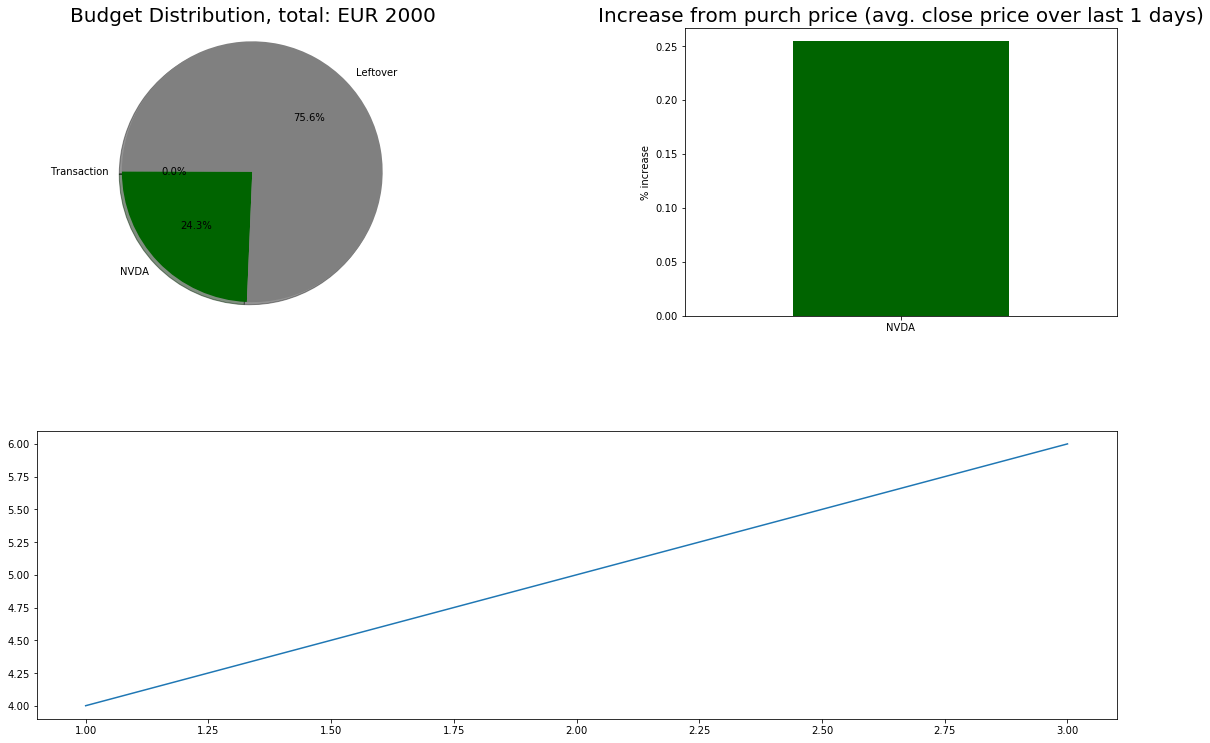

In [37]:
create_charts(portfolio, budget, days=1)

---
---
### Scraping Example

In [444]:
from yahoo_scraping import YahooFinanceHistory
tickers = ['AAPL', 'SPY', 'AEX', 'NVDA', 'RUN', 'BFIT']
days_back = 100
stock_info = {}

In [445]:
dict.fromkeys(tickers)
for ticker in tickers:
    stock_info[ticker] = YahooFinanceHistory(ticker, days_back=days_back).get_quote()

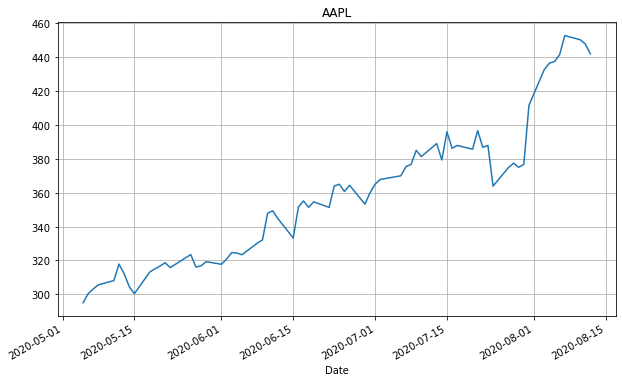

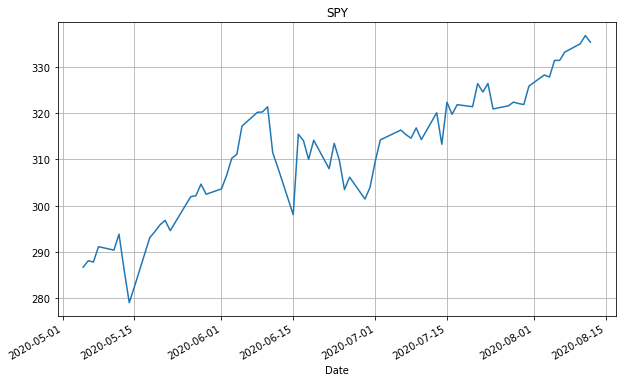

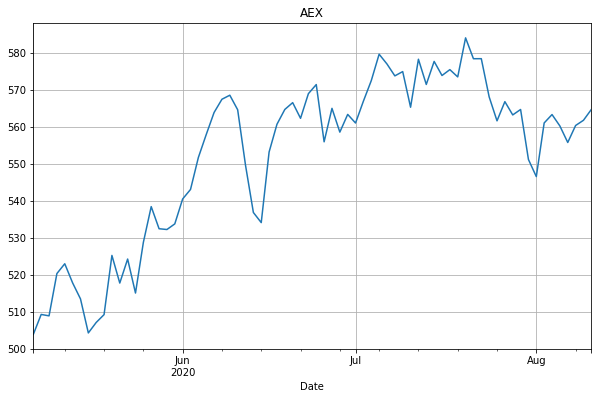

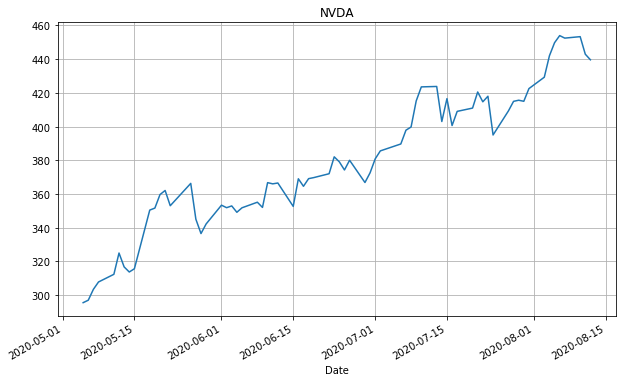

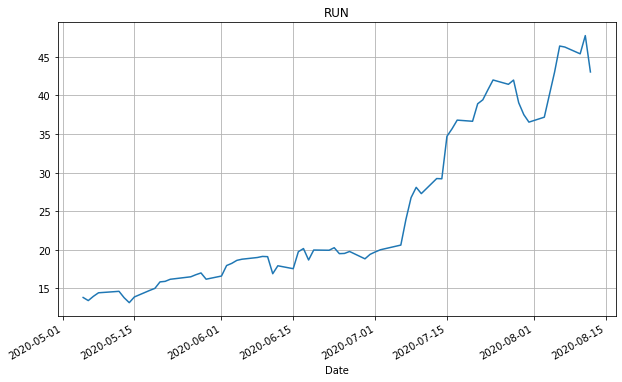

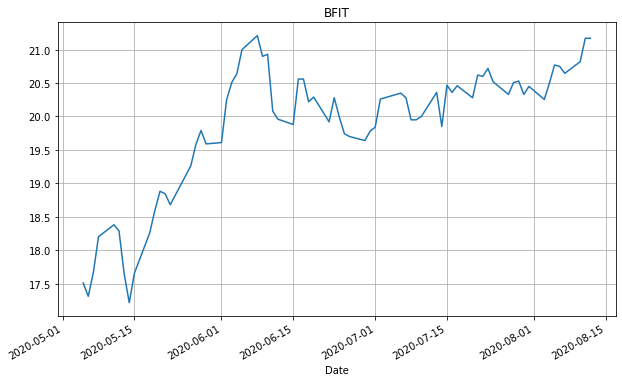

In [446]:
for stock in stock_info.keys():
    stock_info[stock].plot(x='Date', y='Open', grid=True, legend=False, title=stock, figsize=(10,6))